# Data Preparation

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline


In [3]:
# Loading the Dataset
df1 = pd.read_csv(r'../data/poc_sleep_v2_dataset.csv')
df2 = pd.read_csv(r'../data/poc_sleep_base_dataset.csv')


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                500 non-null    int64  
 1   Gender                   500 non-null    object 
 2   Age                      500 non-null    int64  
 3   Sleep Duration           500 non-null    float64
 4   Quality of Sleep         500 non-null    int64  
 5   Physical Activity Level  500 non-null    int64  
 6   Stress Level             500 non-null    int64  
 7   BMI Category             500 non-null    object 
 8   Blood Pressure           500 non-null    object 
 9   Heart Rate               500 non-null    int64  
 10  Sleep Disorder           206 non-null    object 
dtypes: float64(1), int64(6), object(4)
memory usage: 43.1+ KB


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               374 non-null    int64  
 1   Person ID                374 non-null    int64  
 2   Gender                   374 non-null    object 
 3   Age                      374 non-null    int64  
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(4)
memory usage: 35.2+ KB


In [6]:
df2.drop(columns=['Person ID', 'Unnamed: 0'], inplace=True)

In [7]:
df1.drop(columns=['Person ID'], inplace=True)

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   500 non-null    object 
 1   Age                      500 non-null    int64  
 2   Sleep Duration           500 non-null    float64
 3   Quality of Sleep         500 non-null    int64  
 4   Physical Activity Level  500 non-null    int64  
 5   Stress Level             500 non-null    int64  
 6   BMI Category             500 non-null    object 
 7   Blood Pressure           500 non-null    object 
 8   Heart Rate               500 non-null    int64  
 9   Sleep Disorder           206 non-null    object 
dtypes: float64(1), int64(5), object(4)
memory usage: 39.2+ KB


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Sleep Duration           374 non-null    float64
 3   Quality of Sleep         374 non-null    int64  
 4   Physical Activity Level  374 non-null    int64  
 5   Stress Level             374 non-null    int64  
 6   BMI Category             374 non-null    object 
 7   Blood Pressure           374 non-null    object 
 8   Heart Rate               374 non-null    int64  
 9   Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(5), object(4)
memory usage: 29.3+ KB


Concatenating the two dataframs

In [10]:
df = pd.concat([df1, df2])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 874 entries, 0 to 373
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   874 non-null    object 
 1   Age                      874 non-null    int64  
 2   Sleep Duration           874 non-null    float64
 3   Quality of Sleep         874 non-null    int64  
 4   Physical Activity Level  874 non-null    int64  
 5   Stress Level             874 non-null    int64  
 6   BMI Category             874 non-null    object 
 7   Blood Pressure           874 non-null    object 
 8   Heart Rate               874 non-null    int64  
 9   Sleep Disorder           361 non-null    object 
dtypes: float64(1), int64(5), object(4)
memory usage: 75.1+ KB


In [12]:
df.head()

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Sleep Disorder
0,Male,49,6.0,6,90,8,Overweight,140/95,75,Sleep Apnea
1,Female,52,6.5,6,45,7,Overweight,130/85,72,Sleep Apnea
2,Male,43,7.8,8,90,5,Normal,130/85,70,NaN
3,Male,44,6.5,7,45,7,Overweight,130/85,72,Insomnia
4,Male,35,7.6,7,75,4,Normal,120/80,70,NaN


### EDA

In [16]:
# Shape
df.shape

(874, 10)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                10000 non-null  int64  
 1   Gender                   10000 non-null  object 
 2   Age                      10000 non-null  int64  
 3   Sleep Duration           10000 non-null  float64
 4   Quality of Sleep         10000 non-null  int64  
 5   Physical Activity Level  10000 non-null  int64  
 6   Stress Level             10000 non-null  int64  
 7   BMI Category             10000 non-null  object 
 8   Blood Pressure           10000 non-null  object 
 9   Heart Rate               10000 non-null  int64  
 10  Sleep Disorder           3864 non-null   object 
dtypes: float64(1), int64(6), object(4)
memory usage: 859.5+ KB


In [17]:
df.describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate
count,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000
mean,42.471396,7.168650,7.379863,59.508009,5.339817,69.820366
std,9.102307,0.788579,1.143679,20.047151,1.750168,3.622950
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000
25%,35.000000,6.500000,6.000000,45.000000,4.000000,68.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000


In [66]:
# Numerical and Categorical features

categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()
numerical_cols = df.select_dtypes(exclude=['object']).columns.tolist()
categorical_cols, numerical_cols


([],
 ['Age',
  'Sleep Duration',
  'Quality of Sleep',
  'Physical Activity Level',
  'Stress Level',
  'Heart Rate',
  'Sleep Disorder',
  'Gender_Male',
  'BMI Category_Normal Weight',
  'BMI Category_Obese',
  'BMI Category_Overweight',
  'Systolic',
  'Diastolic'])

In [19]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [20]:
#Unique values in Categorical data
for col in categorical_cols:
    if col == 'Person ID':
        continue
    print(f"{col}: {df[col].unique()}")

Gender: ['Male' 'Female']
BMI Category: ['Overweight' 'Normal' 'Normal Weight' 'Obese']
Blood Pressure: ['140/95' '130/85' '120/80' '115/75' '125/80' '135/90' '_RARE_' '126/83'
 '140/90' '132/87' '130/86' '117/76' '118/76' '128/85' '131/86' '128/84'
 '135/88' '129/84' '115/78' '119/77' '121/79' '125/82' '122/80' '142/92'
 '139/91' '118/75']
Sleep Disorder: ['Sleep Apnea' nan 'Insomnia']


In [21]:
#Describe the Numerical values
df.describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate
count,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000
mean,42.471396,7.168650,7.379863,59.508009,5.339817,69.820366
std,9.102307,0.788579,1.143679,20.047151,1.750168,3.622950
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000
25%,35.000000,6.500000,6.000000,45.000000,4.000000,68.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000


In [22]:
# Deleting the Person ID Column

df = df.drop(columns=['Person ID'])

KeyError: "['Person ID'] not found in axis"

#### AGE

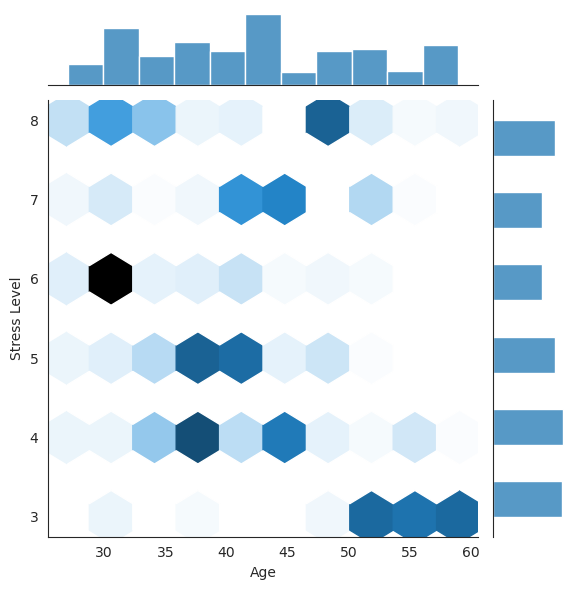

In [23]:
with sns.axes_style('white'):
    sns.jointplot(x="Age", y="Stress Level", data=df, kind='hex')

In [24]:
df.columns

Index(['Gender', 'Age', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category',
       'Blood Pressure', 'Heart Rate', 'Sleep Disorder'],
      dtype='object')

##### Finding unique values in all columns

In [25]:
for col in df.columns:
    print(f"{col} :  {df[col].unique()}", end='\n\n')

Gender :  ['Male' 'Female']

Age :  [49 52 43 44 35 57 38 37 50 59 31 56 28 39 58 45 48 54 40 32 42 41 30 33
 53 34 51 55 46 29 47 36 27]

Sleep Duration :  [6.  6.5 7.8 7.6 8.1 7.1 7.2 6.1 7.3 8.  7.7 8.2 6.4 6.2 6.9 8.4 6.8 7.5
 6.3 7.4 7.9 6.6 8.5 6.7 8.3 5.9 5.8]

Quality of Sleep :  [6 8 7 9 4 5]

Physical Activity Level :  [90 45 75 60 30 70 55 40 50 42 35 32 80 47 65 85]

Stress Level :  [8 7 5 4 3 6]

BMI Category :  ['Overweight' 'Normal' 'Normal Weight' 'Obese']

Blood Pressure :  ['140/95' '130/85' '120/80' '115/75' '125/80' '135/90' '_RARE_' '126/83'
 '140/90' '132/87' '130/86' '117/76' '118/76' '128/85' '131/86' '128/84'
 '135/88' '129/84' '115/78' '119/77' '121/79' '125/82' '122/80' '142/92'
 '139/91' '118/75']

Heart Rate :  [75 72 70 68 78 65 83 77 80 73 79 76 85 82 69 81 84 74 67 86]

Sleep Disorder :  ['Sleep Apnea' nan 'Insomnia']



In [26]:
df['Sleep Disorder'].fillna('Normal', inplace=True)

In [27]:
df.drop(df[df['Blood Pressure'] == '_RARE_'].index, inplace=True)


#### AGE vs Insomnia

<Axes: xlabel='Age', ylabel='Sleep Disorder'>

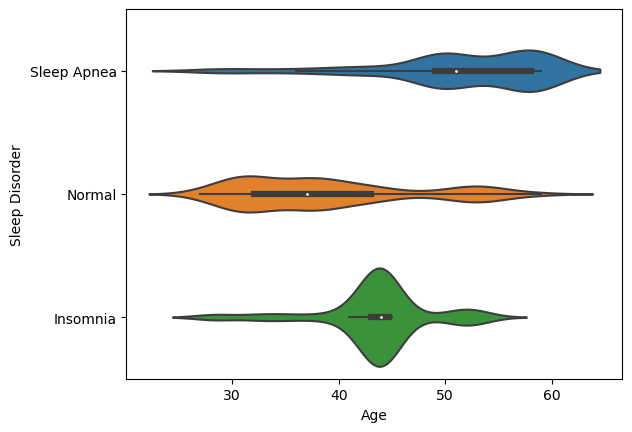

In [28]:
sns.violinplot(x=df['Age'], y=df['Sleep Disorder'])

<Axes: xlabel='Age', ylabel='Sleep Disorder'>

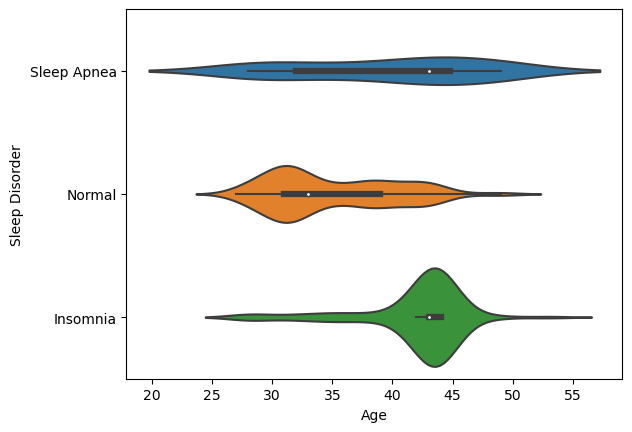

In [29]:
# Male - Sleep Disorder based on Age
sns.violinplot(x='Age', y='Sleep Disorder', data=df[df.Gender == 'Male'] )

<Axes: xlabel='Age', ylabel='Sleep Disorder'>

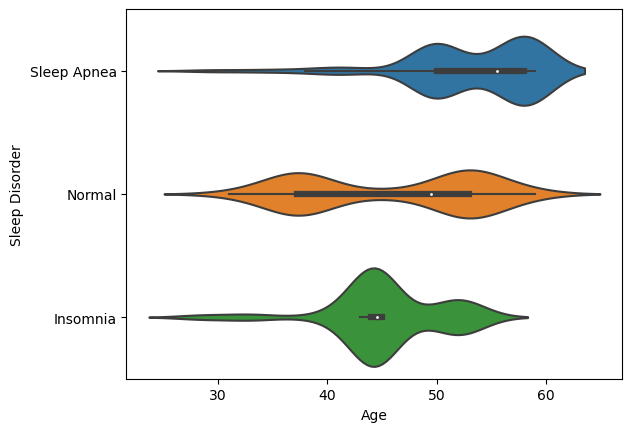

In [30]:
# Male - Sleep Disorder based on Age
sns.violinplot(x='Age', y='Sleep Disorder', data=df[df.Gender == 'Female'] ) 

# Data Preparation

In [31]:
for col in df.columns:
    print(f"{col} :  {df[col].unique()}", end='\n\n')

Gender :  ['Male' 'Female']

Age :  [49 52 43 44 35 57 38 37 50 59 31 56 28 39 58 45 48 54 32 42 40 41 30 33
 53 51 55 46 29 36 47 34 27]

Sleep Duration :  [6.  6.5 7.8 7.6 8.1 7.1 7.2 6.1 7.3 8.  7.7 8.2 6.4 6.9 8.4 6.2 7.5 6.3
 7.4 7.9 6.6 8.5 8.3 6.7 6.8 5.9 5.8]

Quality of Sleep :  [6 8 7 9 4 5]

Physical Activity Level :  [90 45 75 60 30 70 55 40 50 42 35 32 80 47 65 85]

Stress Level :  [8 7 5 4 3 6]

BMI Category :  ['Overweight' 'Normal' 'Normal Weight' 'Obese']

Blood Pressure :  ['140/95' '130/85' '120/80' '115/75' '125/80' '135/90' '126/83' '140/90'
 '132/87' '130/86' '117/76' '118/76' '128/85' '131/86' '128/84' '135/88'
 '129/84' '115/78' '119/77' '121/79' '125/82' '122/80' '142/92' '139/91'
 '118/75']

Heart Rate :  [75 72 70 68 78 65 83 77 80 76 85 82 69 81 84 74 67 73 86]

Sleep Disorder :  ['Sleep Apnea' 'Normal' 'Insomnia']



# Feature Engineering

##### GENDER - One Hot Encoding

In [43]:
# df = pd.get_dummies(df, columns=['Gender'], dtype=int, drop_first=True)
df = pd.get_dummies(df, columns=['BMI Category'], dtype=int, drop_first=True)
df

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Blood Pressure,Heart Rate,Sleep Disorder,Gender_Male,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight
0,49,6.0,6,90,8,140/95,75,Sleep Apnea,1,0,0,1
1,52,6.5,6,45,7,130/85,72,Sleep Apnea,0,0,0,1
2,43,7.8,8,90,5,130/85,70,Normal,1,0,0,0
3,44,6.5,7,45,7,130/85,72,Insomnia,1,0,0,1
4,35,7.6,7,75,4,120/80,70,Normal,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
369,59,8.1,9,75,3,140/95,68,Sleep Apnea,0,0,0,1
370,59,8.0,9,75,3,140/95,68,Sleep Apnea,0,0,0,1
371,59,8.1,9,75,3,140/95,68,Sleep Apnea,0,0,0,1
372,59,8.1,9,75,3,140/95,68,Sleep Apnea,0,0,0,1


In [47]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sleep Disorder'] = le.fit_transform(df['Sleep Disorder'])

In [49]:
le.classes_

array(['Insomnia', 'Normal', 'Sleep Apnea'], dtype=object)

In [51]:
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True).astype(int)

In [54]:
df.drop(columns=['Blood Pressure'], inplace=True)
df

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Sleep Disorder,Gender_Male,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight,Systolic,Diastolic
0,49,6.0,6,90,8,75,2,1,0,0,1,140,95
1,52,6.5,6,45,7,72,2,0,0,0,1,130,85
2,43,7.8,8,90,5,70,1,1,0,0,0,130,85
3,44,6.5,7,45,7,72,0,1,0,0,1,130,85
4,35,7.6,7,75,4,70,1,1,0,0,0,120,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,59,8.1,9,75,3,68,2,0,0,0,1,140,95
370,59,8.0,9,75,3,68,2,0,0,0,1,140,95
371,59,8.1,9,75,3,68,2,0,0,0,1,140,95
372,59,8.1,9,75,3,68,2,0,0,0,1,140,95


In [63]:
ref = df.sample(100)
ref.to_csv('reference.csv', index=False) # For Evidently AI

In [64]:
df.to_csv('dataset_preprocessed.csv', index=False)

In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Sleep Disorder'])
y = df['Sleep Disorder']

In [60]:
X.shape

(825, 12)

In [61]:
y.shape

(825,)

In [62]:
X.to_csv('X_data.csv')
y.to_csv('y_data.csv')

In [55]:
# df[df['BMI Category'] ==  'Normal Weight']